<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [72]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
#reading the csv file
path = './sat_scores.csv'
sat = pd.read_csv(path)
#Ovewview of the sat dataset
sat_info = sat.info()
#descriptive statistic of SAT
sat_state = sat.describe()

#shape of the dataframe
sat_shape = sat.shape
print (sat_info)
print (sat_state)
print (sat_shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None
            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000
(52, 4)


In [4]:
#get the columns from the dataframe
sat_column = sat.columns

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
#SAT dictionary
sat_data = {'State':sat['State'],
            'Rate':sat['Rate'],
            'Verbal':sat['Verbal'],
            'Math':sat['Math']}
sat_df = pd.DataFrame(sat_data,columns = sat_column)
print sat_df.dtypes

#Type of dataset using .read_csv()
sat_var_type = sat.dtypes
print (sat_var_type)
Ans ='''
theres no difference between the type using pd.read_csv() 
or pd.DataFrame()
'''
print sat_data['State']


State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
0      CT
1      NJ
2      MA
3      NY
4      NH
5      RI
6      PA
7      VT
8      ME
9      VA
10     DE
11     MD
12     NC
13     GA
14     IN
15     SC
16     DC
17     OR
18     FL
19     WA
20     TX
21     HI
22     AK
23     CA
24     AZ
25     NV
26     CO
27     OH
28     MT
29     WV
30     ID
31     TN
32     NM
33     IL
34     KY
35     WY
36     MI
37     MN
38     KS
39     AL
40     NE
41     OK
42     MO
43     LA
44     WI
45     AR
46     UT
47     IA
48     SD
49     ND
50     MS
51    All
Name: State, dtype: object


In [6]:
#SAT dictionary
sat_df

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
#First ten rows of sat
sat.head(10)
#Descending order by rate
#unsure what rate means

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [201]:
#initialize sat data dictionary
data_dictionary = {
    "column": sat_column,
    "Type of the variable": sat_var_type,
    "Description of variable": ['States','Participation rate at each State','Average Verbal Score','Average Math Score'],
    "Shape": sat_shape
}
data_dictionary

{'Description of variable': ['States',
  'Participation rate at each State',
  'Average Verbal Score',
  'Average Math Score'],
 'Shape': (52, 4),
 'Type of the variable': State     object
 Rate       int64
 Verbal     int64
 Math       int64
 dtype: object,
 'column': Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

# Rate Distplot

78


/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


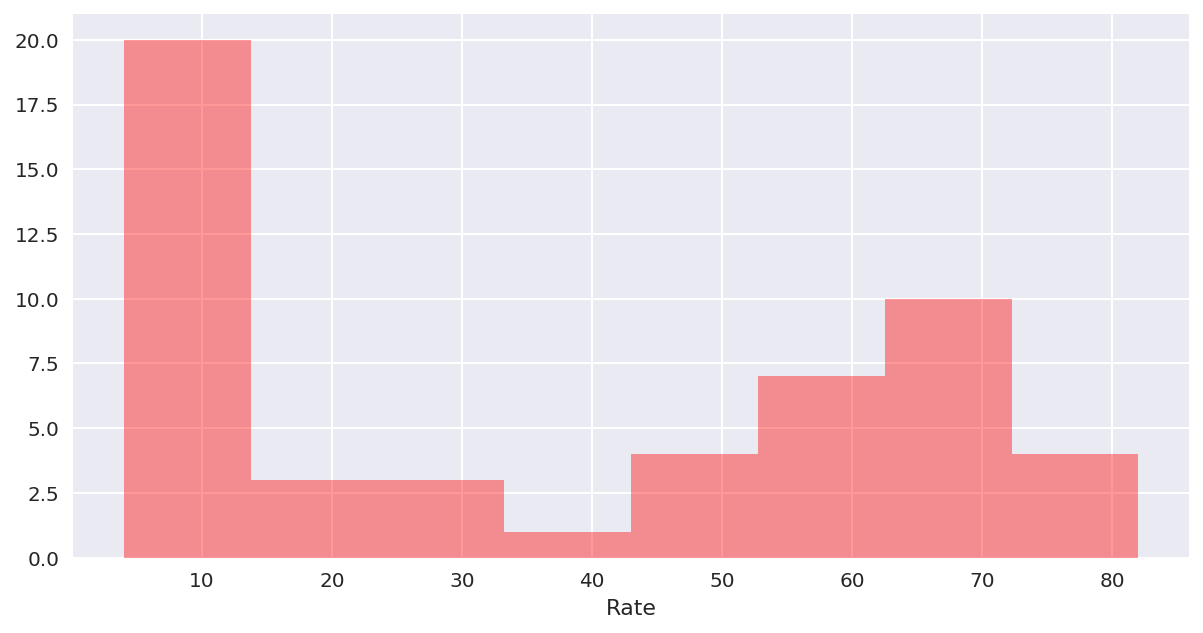

In [9]:
import seaborn as sns
#getting the range give me a better idea of how many bin size 
#I should pick,it is ambitgious to see that rate is right skewed by default
#bin size. 
#plot for Rate
max_rate = max(sat['Rate'])
min_rate = min(sat['Rate'])
rate_range = max_rate - min_rate
print rate_range
#set the width and length of the graph
fig =plt.figure(figsize=(10,5))
sns.distplot(sat['Rate'],bins= 8,kde = False,color='r')

# Math Distplot 

164


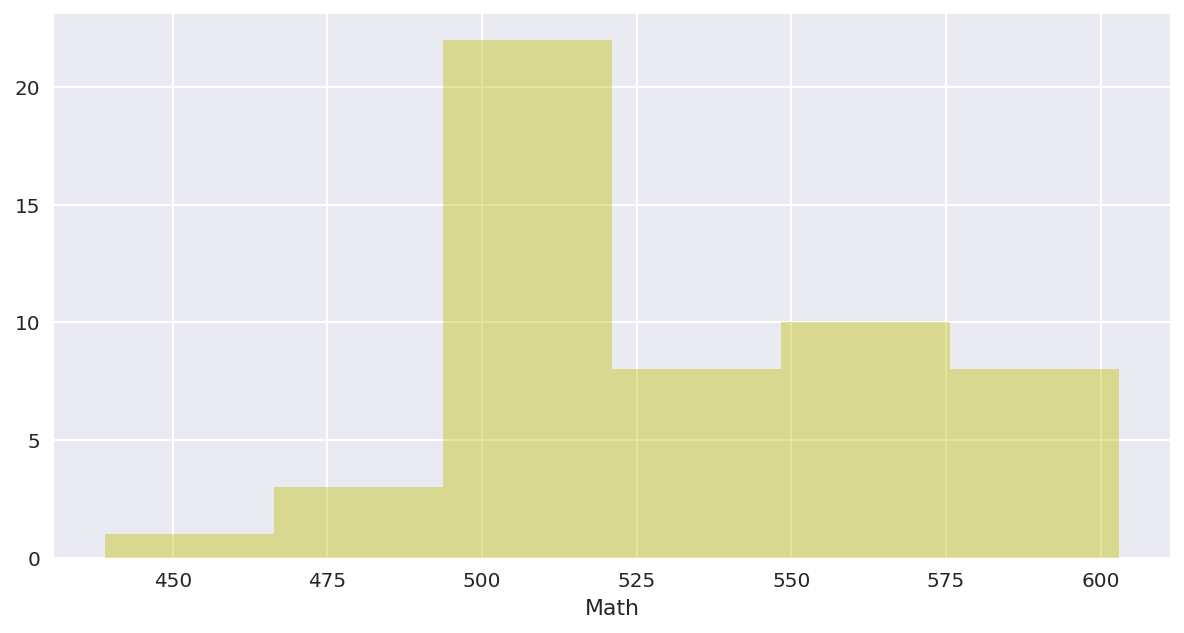

In [10]:
max_math = max(sat['Math'])
min_math = min(sat['Math'])
math_range = max_math - min_math
print math_range
fig =plt.figure(figsize=(10,5))
sns.distplot(sat['Math'],kde = False,color='y')

# Verbal Distplot

111


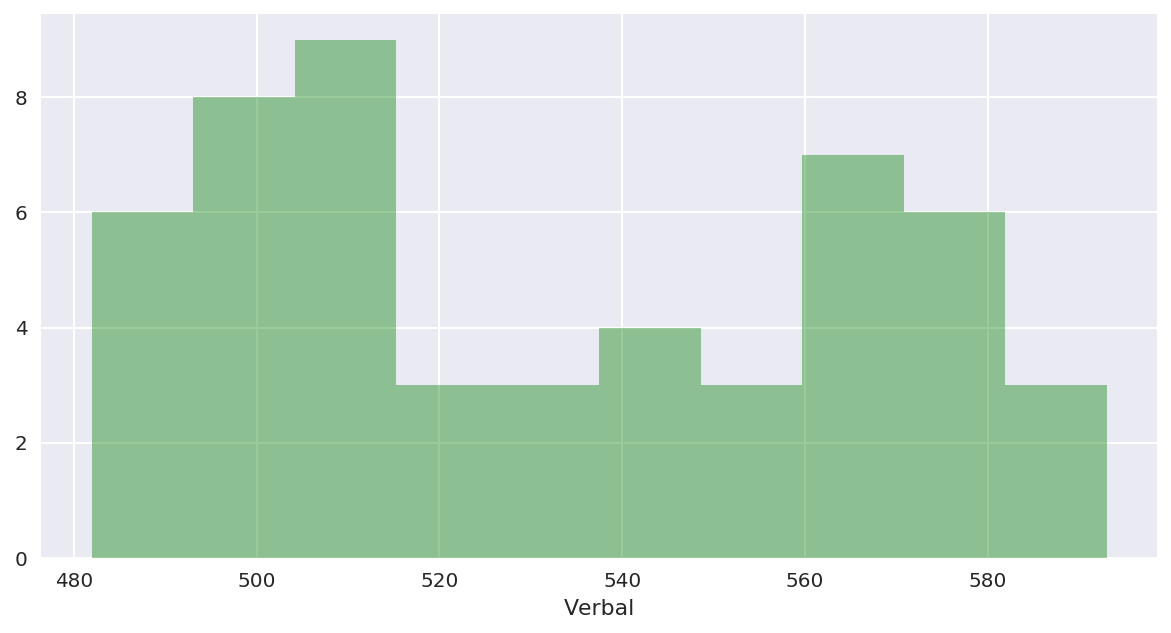

In [11]:
max_verbal = max(sat['Verbal'])
min_verbal = min(sat['Verbal'])
verbal_range = max_verbal - min_verbal
print verbal_range
fig = plt.figure(figsize =(10,5))
sns.distplot(sat['Verbal'],bins= 10,kde = False,color='g')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

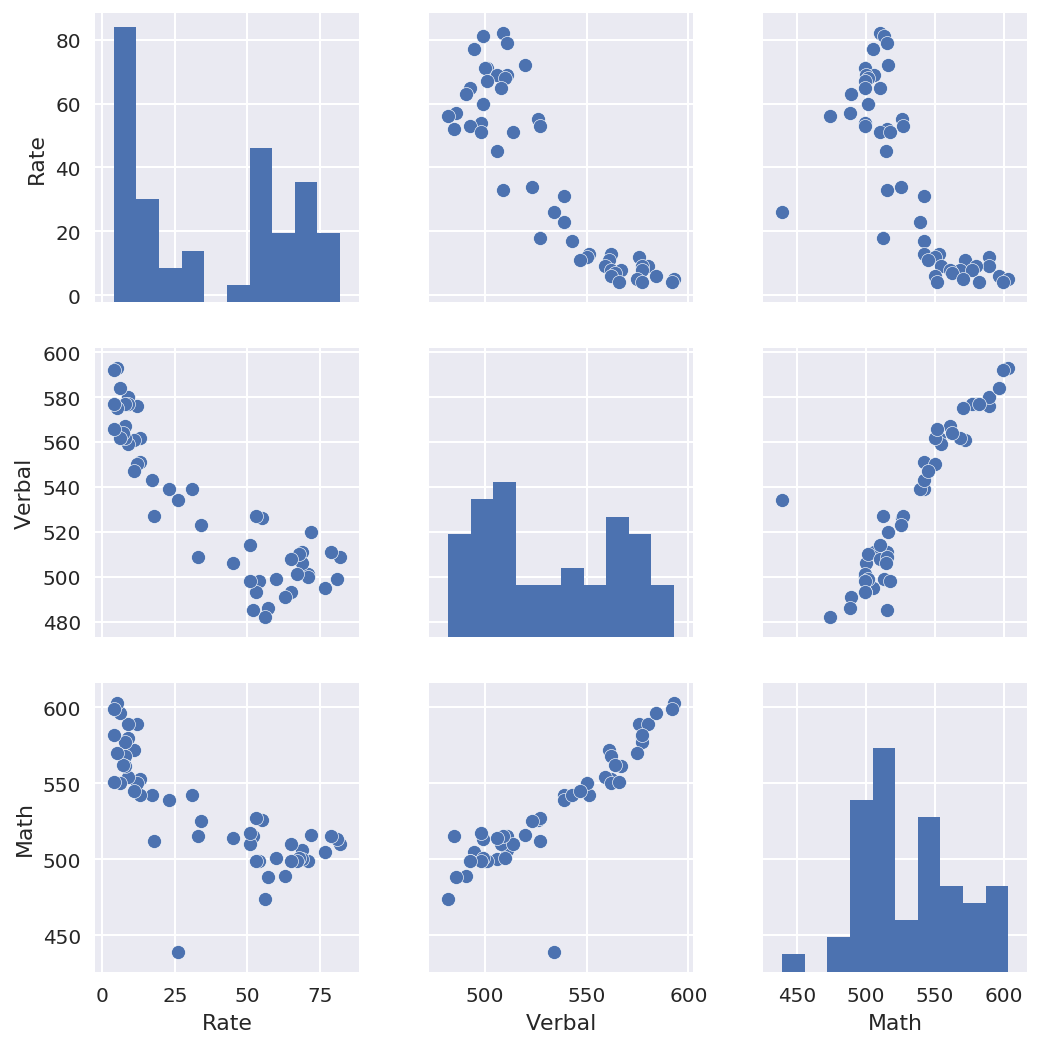

In [12]:
sns.pairplot(sat)

Rate_Math_Verbal = '''
Rate is negatively correlated to both math and verbal,
which means as rate goes up, math and verbal tends to go down
'''
Math_Verbal = '''
Math and verbal are positively correlated, which means that
they both tends to go up together. In another words, a student in 
a random states who has a better verbal score tends to also have
a better math score.'''




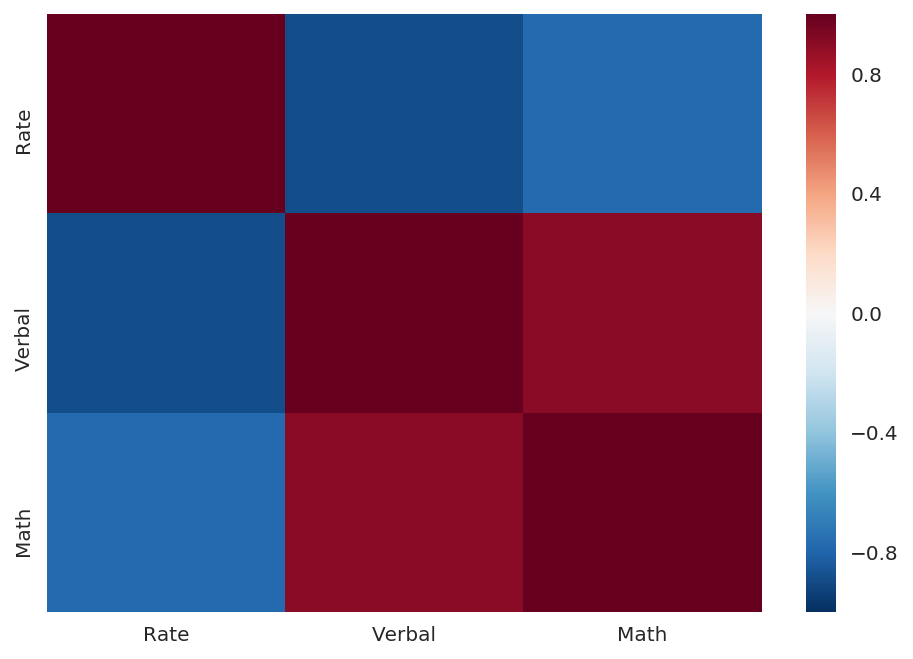

In [13]:
sat_corr = sat.corr()
sns.heatmap(sat_corr)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

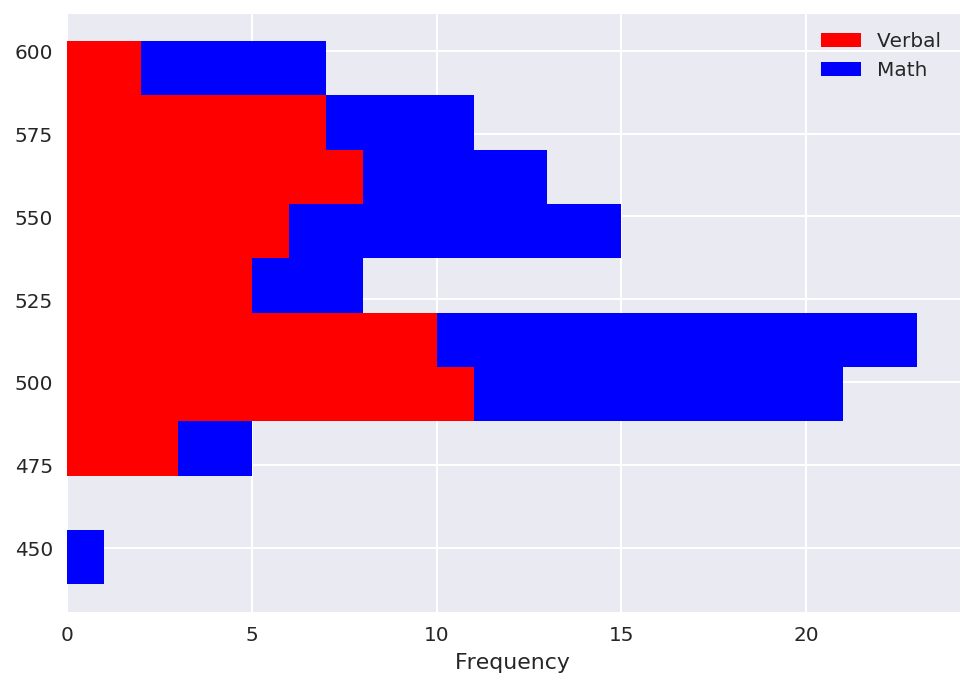

In [14]:
import matplotlib.pyplot as plt
#subsetting only verbal and math 
df2 = pd.DataFrame({'Verbal':sat['Verbal'],'Math':sat['Math']},columns=['Verbal','Math'])

plt.figure();
df2.plot.hist(stacked =True, bins =10, color = ['r','b'],orientation= 'horizontal')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

/opt/conda/envs/python2/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


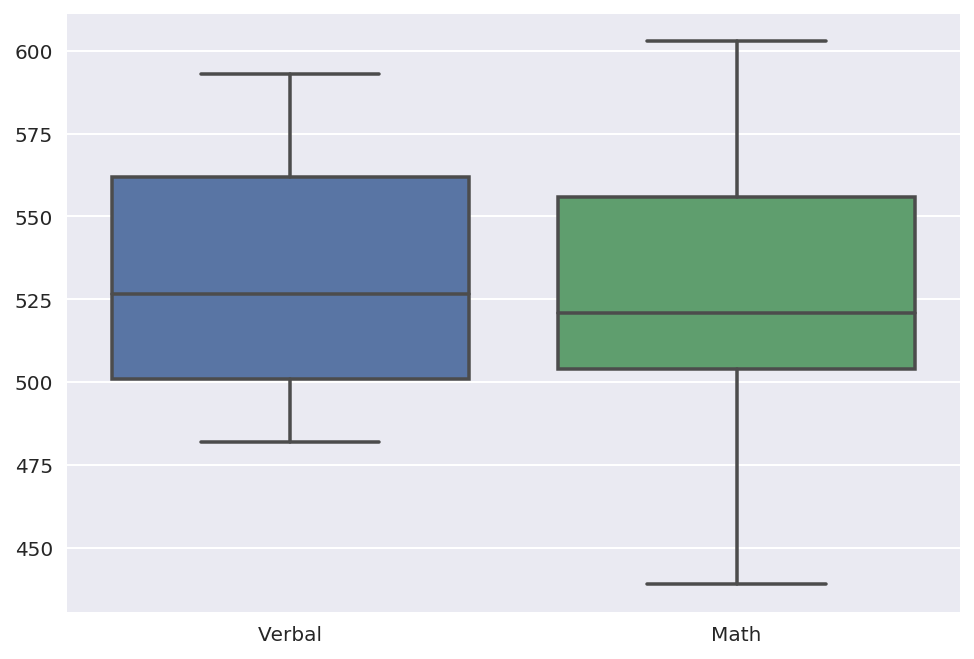

In [15]:
Benefit = '''
Boxplot shows outliers,it tells you what points do not represent the whole population'''
sns.boxplot(df2)
Problem_with_rate = '''
Rate has a significant low value compared to the values with 
math and verbal, when plotting it on the same chart, it is visually
difficult to see the significant comparision between all three variables'''


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


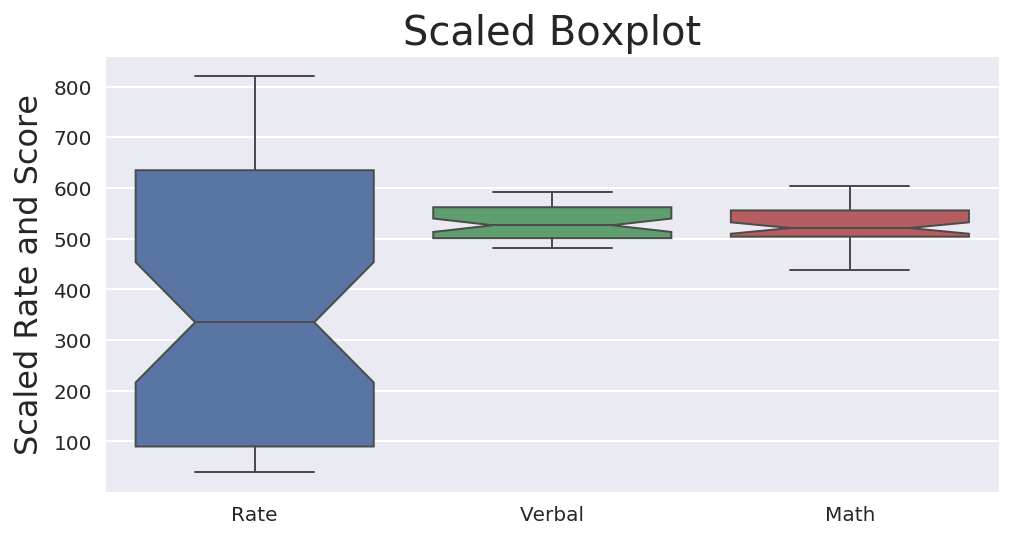

In [174]:
#Define what rate is
Finding = 'http://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate'
Rate = 'Participation rate'
#Explain how rate and average SAT score are correlated
Rate_score = '''
Participation rate has a huge impact on state average SAT score, 
it is because the people who want to take SAT are those most eagar to 
take it which is the why States that have lower participation rate tends to do better and get
higher average SAT scores. In statistic terms, the participation rate and average SAT score 
are negatively correlated.
'''
Scaled_rate_df=pd.DataFrame({'Rate':sat['Rate']*10,'Verbal':sat['Verbal'],'Math':sat['Math']},columns=['Rate','Verbal','Math'])
fig = plt.figure(figsize=(8,4))

ax = fig.gca()
ax = sns.boxplot(Scaled_rate_df,linewidth = 1, orient = 'v', notch=True,ax =ax)

ax.set_ylabel('Scaled Rate and Score',fontsize = 16)
ax.set_title('Scaled Boxplot',fontsize =20)
Ans='scaled the rate by multiplying by 10, but it still didnt make a lot sense putting them sidy by side'









<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
#Find the average scores of all states
mean = sat['Verbal'].mean()
print mean
#Count of the states
#how
count = sum(sat.iloc[:,2]>mean)
print count
#States that has higher average verbal score greater than state avg
sat.loc[sat['Verbal']> mean]
#Percent of states average verbal score greater than state avg
percent = (float(count)/ len(sat['State']))
print percent

Distribution_of_verbal_score = '''
46% of the states scored higher than state avg SAT score'''

532.019230769
24
0.461538461538


526.5
26
0.5


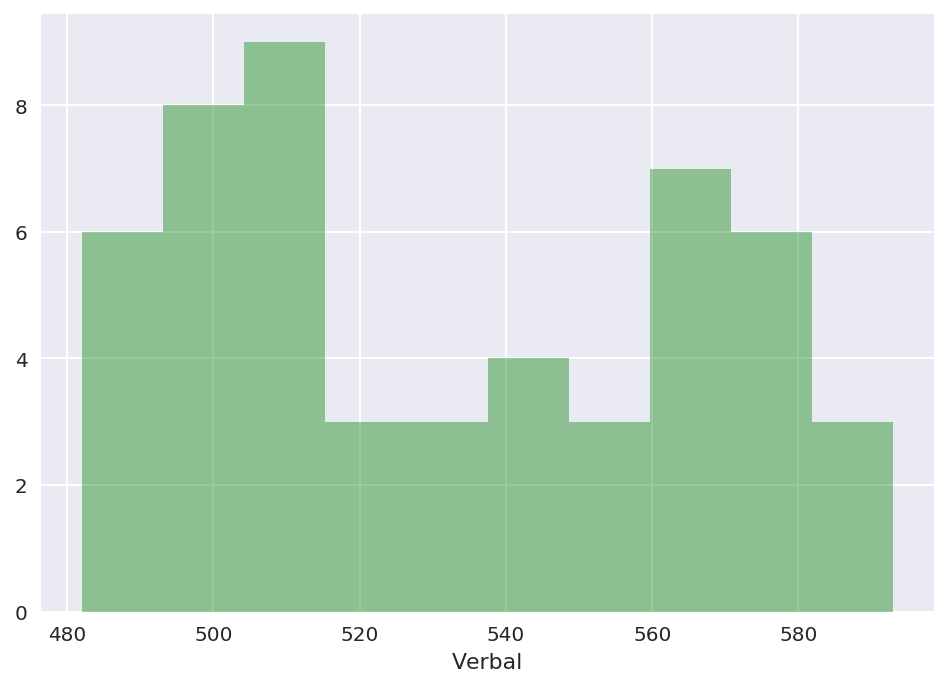

In [18]:
#Find the median of all states avergal verbal score
Median = sat['Verbal'].median()
print Median
#Count of the states that has higher verbal score
count2 = sum(sat.iloc[:,2] > Median)
print count2
#Percentage of States that has higher average verbal score greater than state median verbal score
percent1 = (float(count2)/len(sat['State']))
print percent1
Distribution_of_verbal_median = '''
Half of the states has a higher verbal scores than median.
Median is a better representation of population with skewed
distribution.
'''
sns.distplot(sat['Verbal'],bins= 10,kde = False,color='g')

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
#Create a dataframe of the difference 
df3 = pd.DataFrame({'State':sat['State'],'Difference':sat['Verbal']-sat['Math']})
df3.head(5)

,Difference,State
0,-1,CT
1,-14,NJ
2,-4,MA
3,-10,NY
4,4,NH


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

# Greatest gap between verbal and Math

In [20]:
#Sort the data
df3_sorted = df3.sort_values(by=['Difference'],ascending =False)
#Top 3
df3_sorted.head(3)

,Difference,State
27,95,OH
50,15,MS
29,15,WV


# Greatest gap between Math and verbal

In [21]:
#Create a dataframe 
df4 = pd.DataFrame({'States':sat['State'],'Difference':sat['Math']-sat['Verbal']})
#Sort the data
df4_sorted = df4.sort_values(by=['Difference'],ascending=False)
#Top 3
df4_sorted.head(3)
                   
                   
                   

,Difference,States
21,30,HI
23,19,CA
1,14,NJ


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [22]:
#Create a new dataframe without states
df5 = sat.drop('State',axis =1)
df5
#correlation matrix
df5_corr = df5.corr()
df5_corr

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
#not sure what this question is asking
df5_corr.describe()

,Rate,Verbal,Math
count,3.000000,3.000000,3.000000
mean,-0.220059,0.337813,0.375375
std,1.058104,1.061409,0.996427
min,-0.886432,-0.886432,-0.773746
25%,-0.830089,0.006719,0.063062
50%,-0.773746,0.899871,0.899871
75%,0.113127,0.949935,0.949935
max,1.000000,1.000000,1.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [24]:
df5_cov = df5.cov()
print df5_cov
ans ='''
First, the correlation value is between -1 and 1 so its much easier to see the indication.
Verus covariance the range is infinite its hard to interpret the numbers.

'''


              Rate       Verbal         Math
Rate    745.387632  -804.355958  -760.803922
Verbal -804.355958  1104.646682  1077.147059
Math   -760.803922  1077.147059  1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [140]:
import sqlite3
db = sqlite3.connect('./drug.db.sqlite')

In [176]:
#load the drug csv file
drug = './drug-use-by-age.csv'
df = pd.read_csv(drug)
#overview of the df
df
#find all the null value in the dataframe
# df_null = df.isnull().count()


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


# Description of the Drugs (link):


In [177]:
Alcohol = 'https://www.drugabuse.gov/drugs-abuse/alcohol'
Marijuana = 'https://www.drugabuse.gov/publications/drugfacts/marijuana'
cocaine = 'https://www.drugabuse.gov/publications/drugfacts/cocaine'
crack = 'https://www.drugabuse.gov/drugs-abuse/cocaine'
heroin = 'https://www.drugabuse.gov/drugs-abuse/heroin'
hallucinogen = 'https://www.drugabuse.gov/drugs-abuse/hallucinogens'
inhalant = 'https://www.drugabuse.gov/drugs-abuse/inhalants'
oxycontin = 'https://www.drugs.com/oxycontin.html'
tranquilizer ='https://en.wikipedia.org/wiki/Tranquilizer'
stimulant = 'https://en.wikipedia.org/wiki/Stimulant'
meth ='http://www.methproject.org/answers/what-is-meth.html#The-Drug-Defined'
sedative = 'https://en.wikipedia.org/wiki/Sedative'

Drug_Dictionary = {'Alcohol': Alcohol,
                   'Marijuana': Marijuana,
                   'cocaine':cocaine,
                   'crack':crack,
                   'heroin':heroin,
                   'hallucinogen':hallucinogen,
                   'inhalant':inhalant,
                   'oxycontin':oxycontin,
                   'tranquilizer':tranquilizer,
                   'stimulant':stimulant,
                   'meth':meth,
                   'sedative':sedative}




# DATA CLEANING

In [178]:
# overview of the dataset

#convert data type to float for cocaine-frequency,crack-frequency
#heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
df['cocaine-frequency'] = df['cocaine-frequency'].str.replace('-','0').astype(float)
df['crack-frequency'] = df['crack-frequency'].str.replace('-','0').astype(float)
df['heroin-frequency'] = df['heroin-frequency'].str.replace('-','0').astype(float)
df['inhalant-frequency'] = df['inhalant-frequency'].str.replace('-','0').astype(float)
df['oxycontin-frequency'] = df['oxycontin-frequency'].str.replace('-','0').astype(float)
df['meth-frequency'] = df['meth-frequency'].str.replace('-','0').astype(float)


Assumptions: all the attributes with - value , i just assume they are 0.

In [179]:
df.info()
ans= '''
If I dont convert the data type to int or float, then I wont be 
able to do computation with the dataset'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [180]:
#Columns
df_columns = df.columns
df_columns


Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [181]:
#shape
df.shape

(17, 28)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

# The Big Picture

In [182]:
#Transpose the table 
df_d = df.describe()
df_d

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


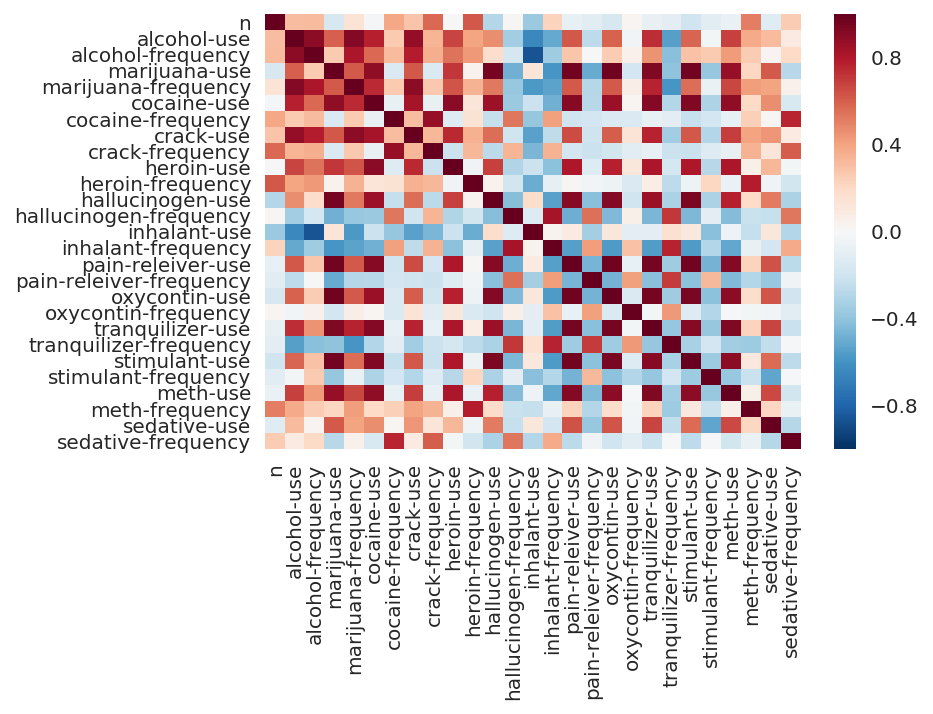

In [183]:
df_corr =df.corr()
sns.heatmap(df_corr)

-Fact: Heroin use has close to no correlation to heroin frequency
       Cocaine use has close to no correlation to heroin frequency
       Alcohol use has high correlation to alcohol frequency as well as marijuana frequency.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
...
Q1: What is the age has to do with the drugs in the dataset?

Hypothesis: People tend to use more Schedule I and Schedule II as they as age

Deliverables: Define Schedule I and Schedule II drugs
                compare the mean 
                show visualization of the graph and number
                any interesting trends or patterns
                

 Define schedule of drugs:
 Schedule I(no currently accepted medical use and a high potential for abuse): Marijuana, Heroin
 Schedule II(potentially leading to severe psychological or physical dependenc): Cocaine, meth, crack

# Focus: Age and Drug use

In [203]:
#subset a small group
age_drug_use = df.iloc[:,0:27:2]
age_drug_use.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8,4.5,4,3.2,2.1,1.5,0.9,0
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
heroin-use,0.1,0,0.1,0.2,0.1,0.1,0.4,0.5,0.9,0.6,1.1,0.7,0.6,0.4,0.1,0.1,0
hallucinogen-use,0.2,0.6,1.6,2.1,3.4,4.8,7,8.6,7.4,6.3,5.2,4.5,3.2,1.8,0.6,0.3,0.1
inhalant-use,1.6,2.5,2.6,2.5,3,2,1.8,1.4,1.5,1.4,1,0.8,0.6,0.4,0.3,0.2,0
pain-releiver-use,2,2.4,3.9,5.5,6.2,8.5,9.2,9.4,10,9,10,9,8.3,5.9,4.2,2.5,0.6
oxycontin-use,0.1,0.1,0.4,0.8,1.1,1.4,1.7,1.5,1.7,1.3,1.7,1.3,1.2,0.9,0.3,0.4,0


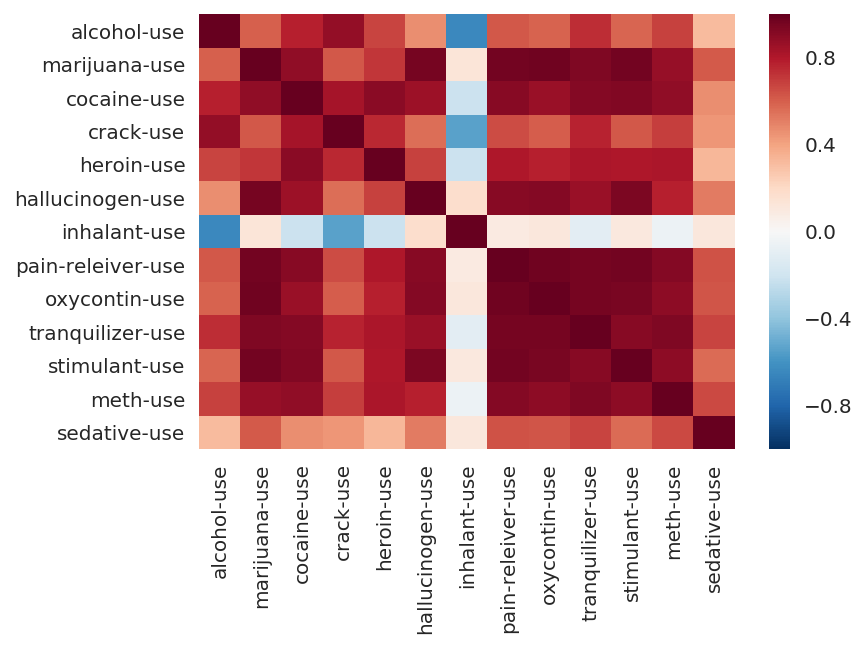

In [128]:
#Stats
age_drug_use_corr = age_drug_use.corr()
sns.heatmap(age_drug_use_corr)

Fact: Pain reliver, oxycontin and tranquilizer are highly correlated. They all have the similar medical use as pain reliever to treat moderate to severe pain.

In [202]:
age_use_drug1 = age_drug_use.describe()
age_use_drug1

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [151]:
#correlation 
Positively_correlated = "Pain-reliver, tranquilizer, stimulant, meth, oxycontin"
Negatively_correlated = 'Inhalant,alcohol - lead to brain damage, a coma or death'

#Top 5 drugs usage
age_use_drug.to_sql(name = 'druguse',con=db,if_exists ='replace',index=False)
pd.read_sql('''select mese
            from druguse
            order by mean Desc
            limit 5''', con =db)
Top_5_drug = 'Alcohol, marijuana, pain-reliver,hallucinogen,,tranquilizer'

,mean
0,55.429412
1,18.923529
2,6.270588
3,3.394118
4,2.805882


# Graph: Age and Highly Addictive Drug Use

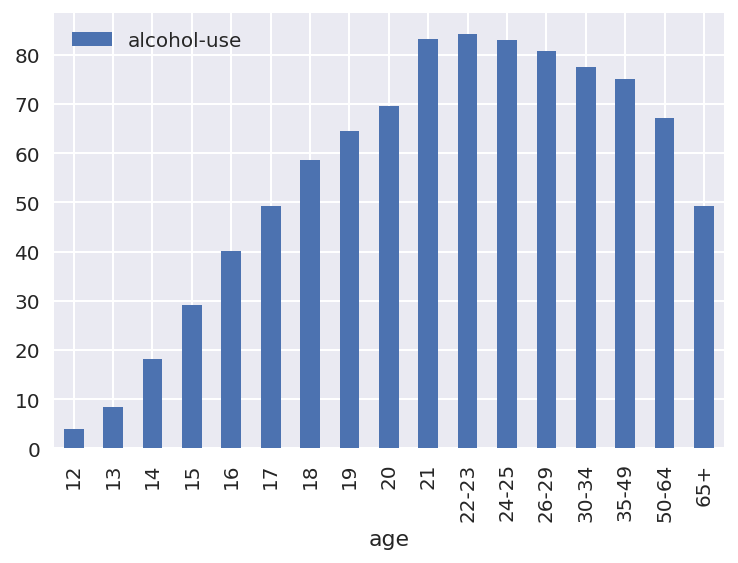

In [204]:
age_drug_use.plot(x='age',y='alcohol-use',kind='bar')# bar chart

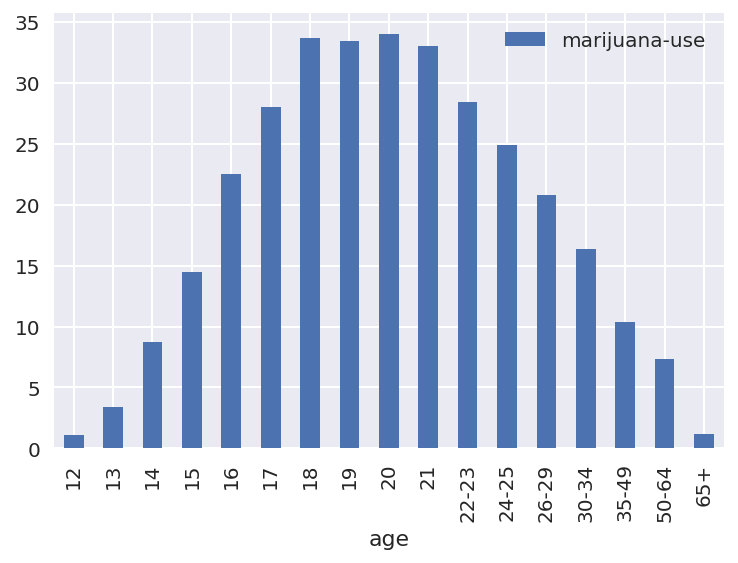

In [205]:
age_drug_use.plot(x='age',y='marijuana-use',kind='bar')

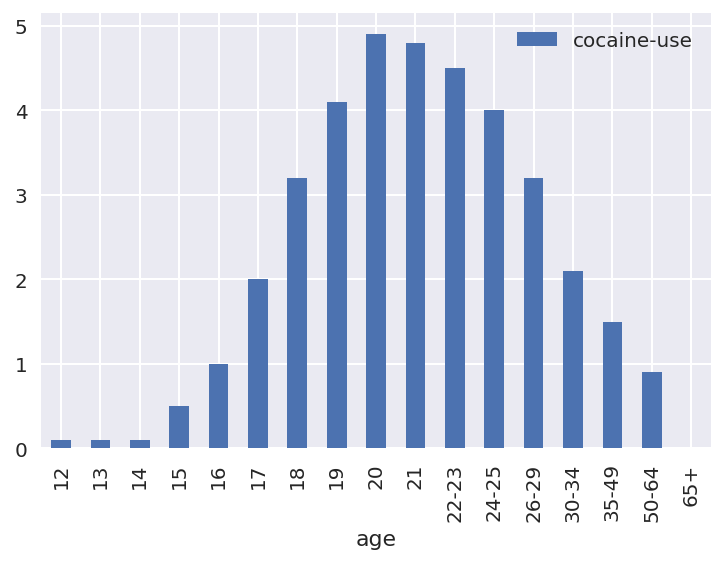

In [206]:
age_drug_use.plot(x='age',y='cocaine-use',kind='bar')

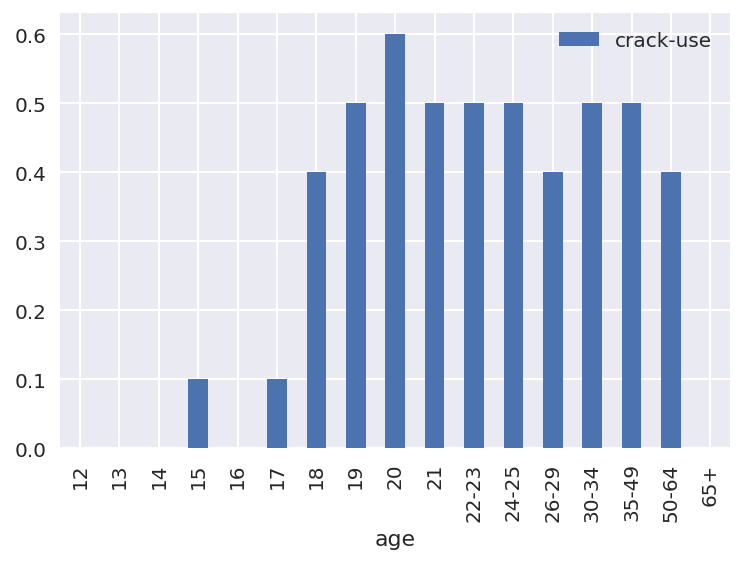

In [207]:
age_drug_use.plot(x='age',y='crack-use',kind='bar')

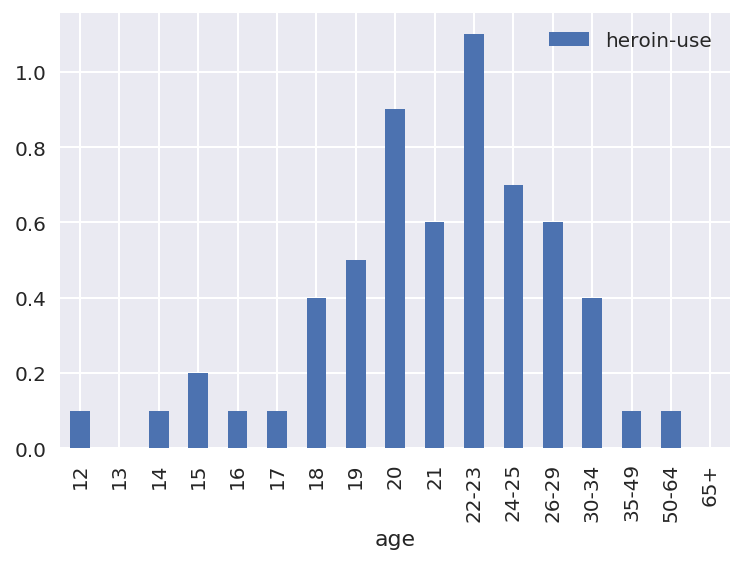

In [208]:
age_drug_use.plot(x='age',y='heroin-use',kind='bar')

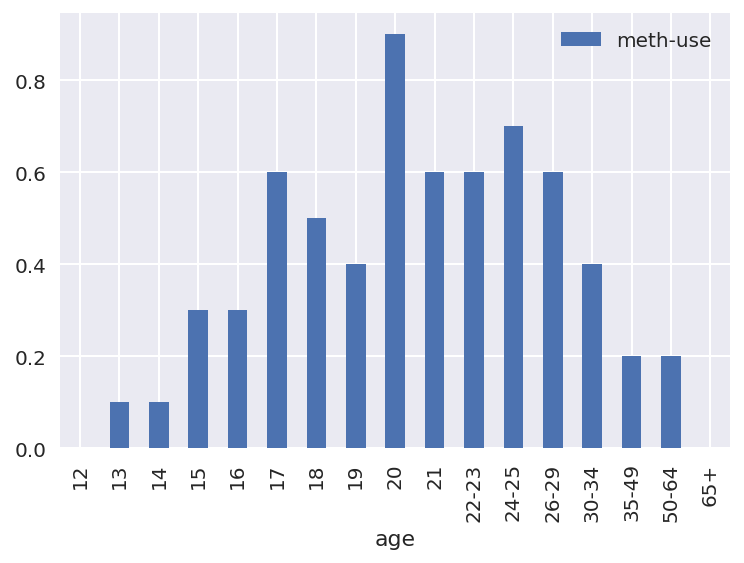

In [209]:
age_drug_use.plot(x='age',y='meth-use',kind='bar')

Finding: Most drug usage peak from age from age 20-25
            Alcohol usage peak after 21 and continued to grow and eventually stable.
            Marijuana usage peak from 16-23 and show significantly decline after 26-29
            Cocaine usage peak from 20 and start declining after 26-29
            Crack usage peak at age 20 and stable through 21-64 a slight decline at age 26-29
            Heroin usage peak at age 22-23 and significantly decline after 26
            Meth usage peak at age 20 and spread through age 29, and significantly decline after 35.
        
Conclusion: People tends to use more schedule I and schedule II as they grow, especially after age 20 but mostly show a sign of significant decline after the age of 35 except there are still some people use marijuana at age of 65.

Next:
    -I would like to create a interactive visualization to show the drug use over age. It must
    more powerful and easy to show my finding. (select a particular drug)
    -Look into the age and drug frequency more to find more correlation to prove my finding
    

# Focus: Age and drug Frequency

In [122]:
age_drug_frequency = df.drop(['n'],axis =1)
age_drug_frequency = age_drug_frequency.iloc[:,0:27:2]
age_drug_frequency.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
alcohol-frequency,3,6,5,6,10,13,24,36,48,52,52,52,52,52,52,52,52
marijuana-frequency,4,15,24,25,30,36,52,60,60,52,52,60,52,72,48,52,36
cocaine-frequency,5,1,5.5,4,7,5,5,5.5,8,5,5,6,5,8,15,36,0
crack-frequency,0,3,0,9.5,1,21,10,2,5,17,5,6,6,15,48,62,0
heroin-frequency,35.5,0,2,1,66.5,64,46,180,45,30,57.5,88,50,66,280,41,120
hallucinogen-frequency,52,6,3,4,3,3,4,3,2,4,3,2,3,2,3,44,2
inhalant-frequency,19,12,5,5.5,3,4,4,3,4,2,4,2,4,3.5,10,13.5,0
pain-releiver-frequency,36,14,12,10,7,9,12,12,10,15,15,15,13,22,12,12,24
oxycontin-frequency,24.5,41,4.5,3,4,6,7,7.5,12,13.5,17.5,20,13.5,46,12,5,0


In [124]:
#look at the state
age_drug_frequency.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-frequency,17.0,68.970588,70.153285,0.0,35.5,50.0,66.5,280.0
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0
inhalant-frequency,17.0,5.794118,4.937291,0.0,3.0,4.0,5.5,19.0
pain-releiver-frequency,17.0,14.705882,6.935098,7.0,12.0,12.0,15.0,36.0
oxycontin-frequency,17.0,13.941176,12.902134,0.0,5.0,12.0,17.5,46.0
tranquilizer-frequency,17.0,11.735294,11.485205,4.5,6.0,10.0,11.0,52.0


In [ ]:
#Finding
At_least_1_outliers = 'Hallucinogen-frequency'
More_than_1_Outliers = 'Cocaine-frequency, heroin-frequency, stimulant-frequency,sedative-frequency'


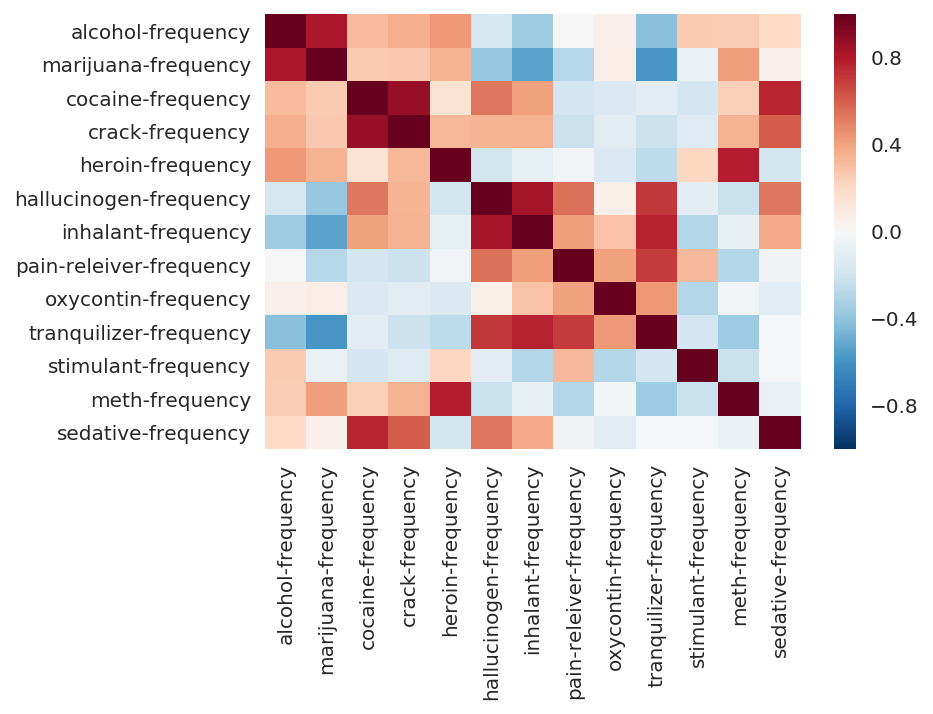

In [132]:
age_drug_frequency_corr = age_drug_frequency.corr()
sns.heatmap(age_drug_frequency_corr)


In [ ]:
#Finding
Strong_Positively_correlated = 'Alcohol-frequency and marijuana-frequency,cocaine-frequency and crack-frequency,hallucinogen and inhalant frequency,pain-reliver and tranquilizer
#it is interesting that see that the drug with similar effect that are highly correlated, I assume they may be substitues for one another
Negatively_correlated = 'marijuana and Tranquilizer'
#You can't really substitute marijuana with Tranquilizer or can you?



Things that I would like to do:
It is to create an interactive visualization that can show the frequency of people using particular drug over range of age. 


In [34]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [212]:
Ans='''I dont see any outliers by subtracting the verbal and 
math score by 3 std'''



<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.